
# Đồ án 2 - Phân tích dữ liệu

Thành viên : 

Đặng Văn Hiển - 18120363

Trà Anh Toàn - 1812662

Lê Thanh Viễn - 18120647

Nguyễn Trần Nhật Minh - 18120208

Nguyễn Vinh Quang - 18120229



In [ ]:
!gdown --id 1IwD1O2ytJPxzMxy--cmMGtSkLswZePdS
!gdown --id 1iWTuPzoeg-CyMViFhqQz7Mgp4Dgni4oN
!gdown --id 1PXpzv_9nYiPXyQwBtuIpQ8vSMYeL1yVk
!ls
!wget https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv

Downloading...
From: https://drive.google.com/uc?id=1IwD1O2ytJPxzMxy--cmMGtSkLswZePdS
To: /content/user.csv
100% 352k/352k [00:00<00:00, 50.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iWTuPzoeg-CyMViFhqQz7Mgp4Dgni4oN
To: /content/playlist.csv
100% 350k/350k [00:00<00:00, 45.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PXpzv_9nYiPXyQwBtuIpQ8vSMYeL1yVk
To: /content/track.csv
100% 253k/253k [00:00<00:00, 35.5MB/s]
data_csv.csv	data_csv.csv.2	playlist.csv  track.csv
data_csv.csv.1	data_csv.csv.3	sample_data   user.csv
--2021-12-15 09:03:22--  https://pkgstore.datahub.io/core/country-list/data_csv/data/d7c9d7cfb42cb69f4422dec222dbbaa8/data_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.21.40.221, 172.67.157.38, 2606:4700:3030::ac43:9d26, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4120 (4.0K) [text/plain]
Saving to: ‘data_csv.csv.4’

data

# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Danh sách mong đợi sẽ thấy từ dữ liệu:


1. Thời lượng playlist nằm trong khoảng nào thì có số lượt thích nhiều 
nhất (10-20, 20-30,30-40)
- Lý do lựa chọn: để tìm thói quen nghe nhạc của người dùng.
2. Playlist thuộc thể loại nào có nhiều lượt thích nhất.
- Tìm ra thể loại mà đa số người dùng ưa thích.
3. Quốc gia nào có nhiều người dùng nhất
- Tìm ra xu hướng mong muốn phát triển của nền tảng tại thị trường quốc gia nào.
4. Quốc gia nào có nhiều người sáng tạo nội dung / người dùng nhất
- Tạo cơ sở để có chính sách phát triển tại các quốc gia có lượng người dùng lớn nhưng lại có lượng người sáng tạo nội dung nhỏ.
5. Thống kê số lượng follower theo quốc gia
- Tìm ra thói quen follow của người dùng tại các quốc gia
6. Thống kê lượt lượt thích, bình luận, tải xuống, lượt chạy, của track theo thể loại, thời lượng và năm xuất bản
- Sự ảnh hưởng của thể loại, thời lượng và năm xuất bản đến hành vi người dùng.
7. Sự ảnh hưởng của số lượng tag với số lượt xem, tải xuống và thích của track
8. Thống kê nghệ sĩ ở đâu dc like nhiều 
- Tìm ra quốc gia có số lượng nghệ sĩ được yêu thích nhiều.
9. Thống kê thời lượng theo quốc gia
- Tìm ra thói quen phong cách sáng tác theo quốc gia
10. Thống kê track nào dc chọn trong playlist nhiều nhất
- Tìm ra track được yêu thích nhất


#Preprocessing

## Tập user

In [ ]:
user_df = pd.read_csv('user.csv')
country_df = pd.read_csv('data_csv.csv').rename(columns={'Code':'country_code'})
country_df=country_df[~country_df['Name'].isin(['Namibia'])]
user_df = pd.merge(country_df, user_df, on='country_code',how='right')
print(user_df['country_code'].unique())
user_df = user_df.drop('country_code',axis=1)
user_df = user_df.rename(columns = {'Name': 'country_name'})

print(user_df['country_name'].unique())


['GB' nan 'IN' 'US' 'JP' 'ES' 'PH' 'DE' 'MX' 'GU' 'LK' 'CZ' 'AU' 'HU' 'CO'
 'AR' 'CA' 'ID' 'NL' 'NZ' 'AO' 'ZA' 'FR' 'DK' 'BR' 'UA' 'EE' 'KE' 'LC'
 'TR' 'CL' 'TH' 'KR' 'PT' 'VE' 'BE' 'RO' 'GR' 'IE' 'AT' 'CH' 'HK' 'DO'
 'VU' 'MU' 'GA' 'CR' 'SE' 'IT' 'FM']
['United Kingdom' nan 'India' 'United States' 'Japan' 'Spain'
 'Philippines' 'Germany' 'Mexico' 'Guam' 'Sri Lanka' 'Czech Republic'
 'Australia' 'Hungary' 'Colombia' 'Argentina' 'Canada' 'Indonesia'
 'Netherlands' 'New Zealand' 'Angola' 'South Africa' 'France' 'Denmark'
 'Brazil' 'Ukraine' 'Estonia' 'Kenya' 'Saint Lucia' 'Turkey' 'Chile'
 'Thailand' 'Korea, Republic of' 'Portugal'
 'Venezuela, Bolivarian Republic of' 'Belgium' 'Romania' 'Greece'
 'Ireland' 'Austria' 'Switzerland' 'Hong Kong' 'Dominican Republic'
 'Vanuatu' 'Mauritius' 'Gabon' 'Costa Rica' 'Sweden' 'Italy'
 'Micronesia, Federated States of']


###**Dữ liệu có bao nhiêu dòng và bao nhiêu cột?**

In [ ]:
user_df.shape

(1100, 26)

Vậy tập User có 1100 dòng và 26 cột

###**Dữ liệu có các dòng bị lặp không?**

In [ ]:
user_df.duplicated().sum()

0

Vậy tập User không có dòng nào lặp

###**Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?**

Mỗi dòng cho biết thông tin của một user và không có vấn đề các dòng có ý nghĩa khác nhau.

###**Mỗi cột có ý nghĩa gì?**

|Thuộc tính|Kiểu dữ liệu| Ý nghĩa |Miền giá trị |
|:---:|:---:|:---:|:---:|
|user_id|string|id người dùng||
|username|string|tên tk người dùng ||
|description|string|mô tả của người dùng||
|country_code|category|mã quốc gia||
|first_name|string|tên||
|last_name|string|họ||
|full_name|string|họ và tên||
|created_at|string|ngày tạo||
|last_modified|string|ngày chỉnh sửa cuối||
|creator_subscription|category|có đăng kí làm người sáng tạo nội dung hay không|['free', 'creator-pro-unlimited']|
|followers_count|numeric|số người theo dõi||
|followings_count|numeric|số người đang theo dõi|zz|
|likes_count|numeric|số lượt thích|zz|
|comments_counts|numeric|số lượt binh luận|zz|
|playlist_likes_count|numeric|số playlist đã thích|zz|
|track_count|numeric|số track của user|zz|
|playlist_count|numeric|số playlist của user|zz|
|reposts_count|numeric|số báo cáo của user|zz|


## Tập track

In [ ]:
track_df = pd.read_csv('track.csv')
track_df.head(3)

,id,title,description,duration,genre,tag_list,user_id,album_title,created_at,last_modified,release_date,display_date,download_count,likes_count,comment_count,reposts_count,playback_count
0,786911779,Merky! Guest Mix Vol. 2 - Calm Stiege,We continue our guest series with ex Crystal C...,1436186,Garage,XDJ-RX2 Grime ukf Uk Funky 140 Garage,768877975,NaN,2020-03-30T16:28:09Z,2020-03-30T16:28:11Z,NaN,2020-03-30T16:28:09Z,0,5,0,4,75
1,778444612,Merky! Guest Mix Vol. 1 - Collate,Kicking off our guest mix series with local DJ...,1285068,Drum & Bass,"dnb liquid Mix rollers Jungle ""jump up"" ""Drum ...",768877975,NaN,2020-03-18T18:31:24Z,2020-03-18T18:33:02Z,NaN,2020-03-18T18:31:24Z,0,8,0,5,90
2,749818084,"Chillo - VOL. 1, Jan 2020",A mix of DnB from our Co-Owner and resident DJ...,2019709,Drum & Bass,Dnb Drums bass jumpup rollers jungle electrontic,768877975,NaN,2020-01-26T16:26:53Z,2020-01-26T16:26:56Z,NaN,2020-01-26T16:26:53Z,0,16,2,6,182


###**Dữ liệu có bao nhiêu dòng và bao nhiêu cột?**

In [ ]:
track_df.shape

(1107, 17)

Vậy tập User có 1100 dòng và 26 cột

###**Dữ liệu có các dòng bị lặp không?**

In [ ]:
track_df.duplicated().sum()

0

Vậy tập User không có dòng nào lặp

###**Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?**

Mỗi dòng cho biết thông tin của một user và không có vấn đề các dòng có ý nghĩa khác nhau.

###**Mỗi cột có ý nghĩa gì?**

<table>
<thead>
<tr>
<th align="center">Thuộc tính</th>
<th align="center">Kiểu dữ liệu</th>
<th align="center">Ý nghĩa</th>
<th align="center">Miền giá trị</th>
</tr>
</thead>
<tbody><tr>
<td align="center">id</td>
<td align="center">string</td>
<td align="center">id của track</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">title</td>
<td align="center">string</td>
<td align="center">tiêu đề của track</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">description</td>
<td align="center">string</td>
<td align="center">mô tả track</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">duration</td>
<td align="center">category</td>
<td align="center">thời lượng track</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">genre</td>
<td align="center">string</td>
<td align="center">loại track</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">tag_list</td>
<td align="center">string</td>
<td align="center">danh sách liên quan</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">user_id</td>
<td align="center">string</td>
<td align="center">id của người chủ trách</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">album_title</td>
<td align="center">string</td>
<td align="center">tiêu đề album</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">created_at</td>
<td align="center">string</td>
<td align="center">ngày tạo track</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">last_modified</td>
<td align="center">category</td>
<td align="center">lần cuối chỉnh sửa</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">release_date</td>
<td align="center">numeric</td>
<td align="center">ngày track xuất hiện</td>
<td align="center"></td>
</tr>
<tr>
<td align="center">display_date</td>
<td align="center">numeric</td>
<td align="center">ngày track xuất hiện trên hệ thống</td>
<td align="center">zz</td>
</tr>
<tr>
<td align="center">download_count</td>
<td align="center">numeric</td>
<td align="center">số lượt tải xuống</td>
<td align="center">zz</td>
</tr>
<tr>
<td align="center">likes_count</td>
<td align="center">numeric</td>
<td align="center">số lượt thích</td>
<td align="center">zz</td>
</tr>
<tr>
<td align="center">comments_counts</td>
<td align="center">numeric</td>
<td align="center">số lượt binh luận</td>
<td align="center">zz</td>
</tr>
<tr>
<td align="center">reposts_count</td>
<td align="center">numeric</td>
<td align="center">số báo cáo của user</td>
<td align="center">zz</td>
</tr>
<tr>
<td align="center">playback_count</td>
<td align="center">numeric</td>
<td align="center">số lượt chạy</td>
<td align="center">zz</td>
</tr>
</tbody></table>

## Tập Playlist

In [ ]:
playlist_df = pd.read_csv('playlist.csv')
playlist_df.head()

,id,title,description,duration,permalink_url,genre,artwork_url,tag_list,user_id,created_at,last_modified,release_date,display_date,tracks,track_count,likes_count,reposts_count
0,88273524,Music,NaN,1895590,https://soundcloud.com/merkz-mercado/sets/music,NaN,NaN,NaN,142397750,2015-03-11T04:02:21Z,2015-03-11T04:02:21Z,NaN,2015-03-11T04:02:21Z,"44168362, 97656500,",2,0,0
1,87994031,Merkz Beats,NaN,0,https://soundcloud.com/merkz-mercado/sets/merk...,NaN,NaN,NaN,142397750,2015-03-10T05:55:45Z,2015-03-10T05:55:45Z,NaN,2015-03-10T05:55:45Z,NaN,0,0,0
2,356937925,New Music🎶,NaN,3539963,https://soundcloud.com/merkz-mercado-483064581...,NaN,NaN,NaN,284136548,2017-10-02T10:23:14Z,2017-10-02T10:23:14Z,NaN,2017-10-02T10:23:14Z,"344529390, 315549497, 307984539, 343430075, 19...",16,0,0
3,335734497,MerkZ 719,NaN,8802142,https://soundcloud.com/merkz-mercado-483064581...,NaN,NaN,NaN,284136548,2017-07-06T04:34:28Z,2017-07-06T04:34:28Z,NaN,2017-07-06T04:34:28Z,"309689093, 321622679, 263980205, 290136983, 29...",41,1,0
4,93243423,merkin em,NaN,1290171,https://soundcloud.com/merkz44th/sets/merkin-em,NaN,NaN,NaN,145257193,2015-03-27T20:16:10Z,2015-03-27T20:16:11Z,NaN,2015-03-27T20:16:10Z,"194471328, 187105448, 102381741, 134903313,",4,1,0


###**Dữ liệu có bao nhiêu dòng và bao nhiêu cột?**

In [ ]:
playlist_df.shape

(1100, 17)

Vậy tập User có 1100 dòng và 26 cột

###**Dữ liệu có các dòng bị lặp không?**

In [ ]:
playlist_df.duplicated().sum()

0

Vậy tập User không có dòng nào lặp

###**Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?**

Mỗi dòng cho biết thông tin của một user và không có vấn đề các dòng có ý nghĩa khác nhau.

###**Mỗi cột có ý nghĩa gì?**

|Thuộc tính|Kiểu dữ liệu| Ý nghĩa |Miền giá trị |
|:---:|:---:|:---:|:---:|
|id|string|định danh của danh sách phát||
|title|string|tiêu đề của danh sách phát ||
|description|string|mô tả của danh sách phát||
|duration|category|thời lượng||
|genre|string|thể loại||
|tag_list|string|danh sách liên quan||
|user_id|string|id của người sở hữu||
|created_at|string|ngày tạo||
|last_modified|category|lần cuối chỉnh sửa||
|release_date|numeric|ngày sản xuất||
|display_date|numeric|ngày track xuất hiện trên hệ thống|zz|
|tracks|numeric|mảng id track|zz|
|track_count|numeric|số track trong playlist|zz|
|likes_count|numeric|số lượt thích|zz|
|reposts_count|numeric|số báo cáo của user|zz|


#Data Cleaning

## Tập user

###**Dữ liệu thiếu không ?**

In [ ]:
for col in user_df:
  if user_df[col].isnull().sum() != 0 :
    print(col +' : '+ str(user_df[col].isnull().sum())+' : '+ str(user_df[col].dtypes))

country_name : 735 : object
username : 1 : object
description : 897 : object
city : 746 : object
visual_url : 844 : object
first_name : 308 : object
last_name : 356 : object
full_name : 308 : object
reposts_count : 1100 : float64


###**Dữ liệu nhiễu không ?**

*Những dữ liệu người dùng nhập vào gây nhiễu chủ yếu kiểu category

#Data Integration

###**Chọn những trường cần thiết**

In [ ]:
selected_playlist_df = playlist_df[['user_id','duration', 'genre', 'tracks', 'likes_count','track_count']]
selected_playlist_df.rename(columns={"duration": "playlist_duration", "genre": "playlist_genre", 'tracks' : 'playlist_tracks','likes_count' : 'playlist_likes_count','track_count':'playlist_track_count'}, inplace=True)
selected_playlist_df.head(3)

,user_id,playlist_duration,playlist_genre,playlist_tracks,playlist_likes_count,playlist_track_count
0,142397750,1895590,NaN,"44168362, 97656500,",0,2
1,142397750,0,NaN,NaN,0,0
2,284136548,3539963,NaN,"344529390, 315549497, 307984539, 343430075, 19...",0,16


In [ ]:
selected_user_df = user_df[['user_id','country_name', 'creator_subscription', 'followers_count', 'likes_count','track_count','playlist_count']]
selected_user_df.rename(columns={"country_name": "user_country_name", "creator_subscription": "user_creator_subscription", 'followers_count' : 'user_followers_count','likes_count' : 'user_likes_count','track_count':'user_track_count','playlist_count':'user_playlist_count'}, inplace=True)
selected_user_df.head(3)

,user_id,user_country_name,user_creator_subscription,user_followers_count,user_likes_count,user_track_count,user_playlist_count
0,768877975,United Kingdom,free,20,1,3,0
1,1197130,United Kingdom,free,53,190,5,0
2,22203417,United Kingdom,free,1,1,2,0


In [ ]:
selected_track_df = track_df[['user_id','duration', 'genre', 'tag_list', 'display_date', 'download_count', 'likes_count', 'playback_count','comment_count']]
selected_track_df.rename(columns={"duration": "track_duration", "genre": "track_genre", 'tag_list' : 'track_tag_list','display_date' : 'track_display_date','download_count' : 'track_download_count','likes_count' : 'track_likes_count','playback_count' : 'track_playback_count','comment_count' : 'track_comment_count'}, inplace=True)
selected_track_df.head(3)

,user_id,track_duration,track_genre,track_tag_list,track_display_date,track_download_count,track_likes_count,track_playback_count,track_comment_count
0,768877975,1436186,Garage,XDJ-RX2 Grime ukf Uk Funky 140 Garage,2020-03-30T16:28:09Z,0,5,75,0
1,768877975,1285068,Drum & Bass,"dnb liquid Mix rollers Jungle ""jump up"" ""Drum ...",2020-03-18T18:31:24Z,0,8,90,0
2,768877975,2019709,Drum & Bass,Dnb Drums bass jumpup rollers jungle electrontic,2020-01-26T16:26:53Z,0,16,182,2


###**So khớp và nhập các bảng**

In [ ]:
df = pd.merge(selected_user_df, selected_playlist_df, on='user_id',how='left')
df = pd.merge(df, selected_track_df, on='user_id',how='outer')
df

,user_id,user_country_name,user_creator_subscription,user_followers_count,user_likes_count,user_track_count,user_playlist_count,playlist_duration,playlist_genre,playlist_tracks,playlist_likes_count,playlist_track_count,track_duration,track_genre,track_tag_list,track_display_date,track_download_count,track_likes_count,track_playback_count,track_comment_count
0,768877975,United Kingdom,free,20,1,3,0,NaN,NaN,NaN,NaN,NaN,1436186.0,Garage,XDJ-RX2 Grime ukf Uk Funky 140 Garage,2020-03-30T16:28:09Z,0.0,5.0,75.0,0.0
1,768877975,United Kingdom,free,20,1,3,0,NaN,NaN,NaN,NaN,NaN,1285068.0,Drum & Bass,"dnb liquid Mix rollers Jungle ""jump up"" ""Drum ...",2020-03-18T18:31:24Z,0.0,8.0,90.0,0.0
2,768877975,United Kingdom,free,20,1,3,0,NaN,NaN,NaN,NaN,NaN,2019709.0,Drum & Bass,Dnb Drums bass jumpup rollers jungle electrontic,2020-01-26T16:26:53Z,0.0,16.0,182.0,2.0
3,1197130,United Kingdom,free,53,190,5,0,NaN,NaN,NaN,NaN,NaN,324223.0,Hiphop,NaN,2012-02-23T16:18:56Z,0.0,2.0,155.0,0.0
4,1197130,United Kingdom,free,53,190,5,0,NaN,NaN,NaN,NaN,NaN,157996.0,Grime,NaN,2012-02-23T16:13:55Z,17.0,4.0,277.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,813911197,Gabon,free,15,29,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2455,14202091,Costa Rica,free,18,4,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,1150012,Sweden,free,5,3,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2457,26262353,Italy,free,0,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Trực quan hoá và phân tích

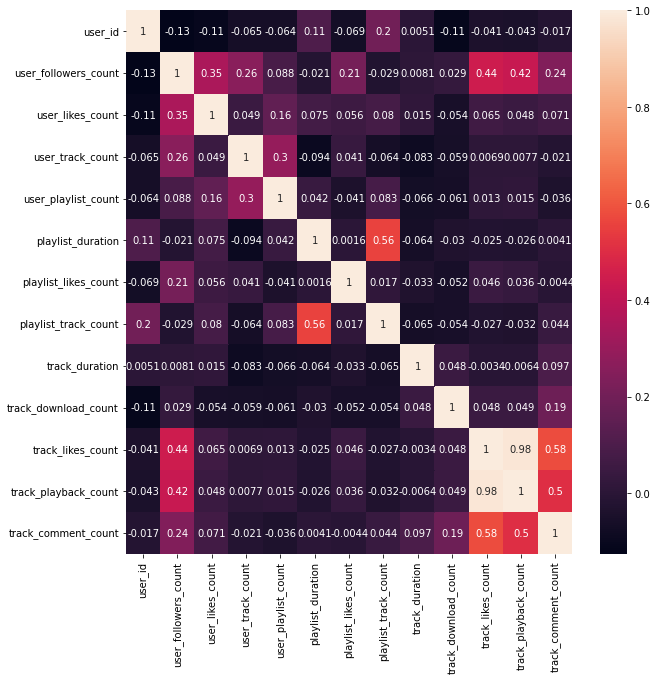

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True);

In [ ]:
# Hàm loại outlier với 95% độ chính xác cho kiểu số
def percentile95_numerical(df,col):
  min_quant = df[col].quantile(.025)
  max_quant = df[col].quantile(.975)
  return df[(df[col]>min_quant) & (df[col]<max_quant)]

In [ ]:
# Hàm loại outlier với 95% độ chính xác cho kiểu định danh
def percentile95_categorical(df,col):
  count_df = df[col].value_counts();  # Tính tần số theo thế loại
  count_df = count_df.sort_values(ascending=True); # Lấy top 20 và sắp xếp tăng
  k = len(df) * 0.05;
  sum = 0;
  value = 0

  while(True):
    value = count_df.iloc[0];
    sum += value;
    count_df.drop(count_df.head(1).index, inplace=True)
    # print(count_df.head(1))
    if sum > k :
      break;

  while(True):
    if count_df.iloc[0] == value:
      count_df.drop(count_df.head(1).index, inplace=True)
    else:
        break;

  return df[df[col].isin(count_df.index.values)]

## Câu hỏi 1 : Thời lượng track nằm trong khoảng nào thì có số lượt thích nhiều nhất

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['track_duration','track_likes_count']]
sub_df = sub_df[sub_df['track_duration'].notna()]

####1. Phân tích đơn biến


In [ ]:
sub_df.describe().round(1)

,track_duration,track_likes_count
count,1438.0,1438.0
mean,253814.8,21.9
std,449794.1,180.5
min,0.0,0.0
25%,125977.0,0.0
50%,186396.5,1.0
75%,241181.0,3.0
max,8796056.0,3784.0


In [ ]:
sub_df['track_duration']=sub_df['track_duration']/1000      # thời lượng tính tính theo giây

In [ ]:
sub_df = percentile95_numerical(sub_df,'track_duration')   # Loại bớt outliner chọn khoảng 95%
sub_df = percentile95_numerical(sub_df,'track_likes_count')   # Loại bớt outliner chọn khoảng 95%

Trực quan 


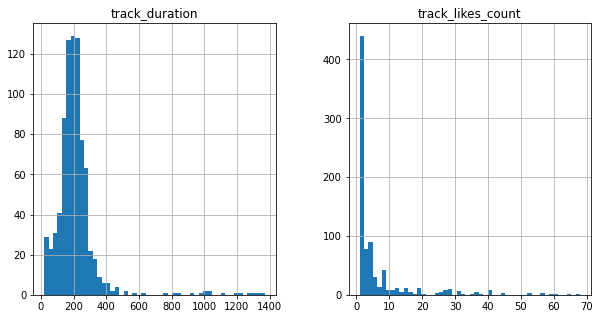

In [ ]:
sub_df.hist(figsize=(10, 5), bins=50);

**Nhận xét**<br>
- Thời lượng của track phổ biến nhất là khoảng 200 giây (3 phút 20 giây)
- Số lượng like của track phổ biến là dưới 10.


####2. Phân tích tương quan đa biến

In [ ]:
# trung bình like với chia thời lượng chia 20 khoảng
mean_like_ser = sub_df['track_likes_count'].groupby([pd.qcut(sub_df.track_duration, q=20, precision =0)]).mean() 

Trực quan


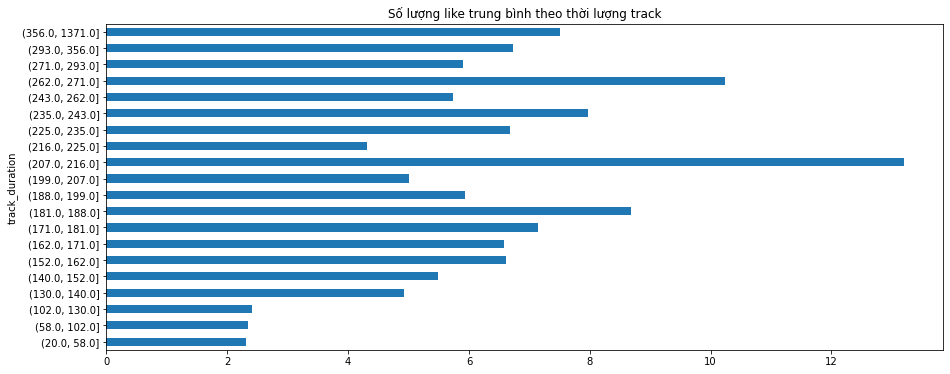

In [ ]:
mean_like_ser.plot( figsize=(15,6), kind='barh',title='Số lượng like trung bình theo thời lượng track');

**Nhận xét**<br>
- Khoảng thời lượng track được người dùng yêu thích nhất là khoảng từ 207 giây đến 216 giây với số lượng like trung bình là 70
- Những track thời lượng dưới 130 thường không nhận được nhiều yêu thích


## Câu hỏi 2 : Playlist thuộc thể loại nào có nhiều lượt thích nhất

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['playlist_genre','playlist_likes_count']]
sub_df = sub_df[sub_df['playlist_genre'].notna()]

####1. Phân tích đơn biến


In [ ]:
sub_df.describe().round(1)

,playlist_likes_count
count,199.0
mean,3.5
std,12.1
min,0.0
25%,0.0
50%,1.0
75%,3.0
max,162.0


In [ ]:
sub_df = percentile95_categorical(sub_df, 'playlist_genre');  # Loại bớt outliner chọn khoảng 95%

Trực quan 


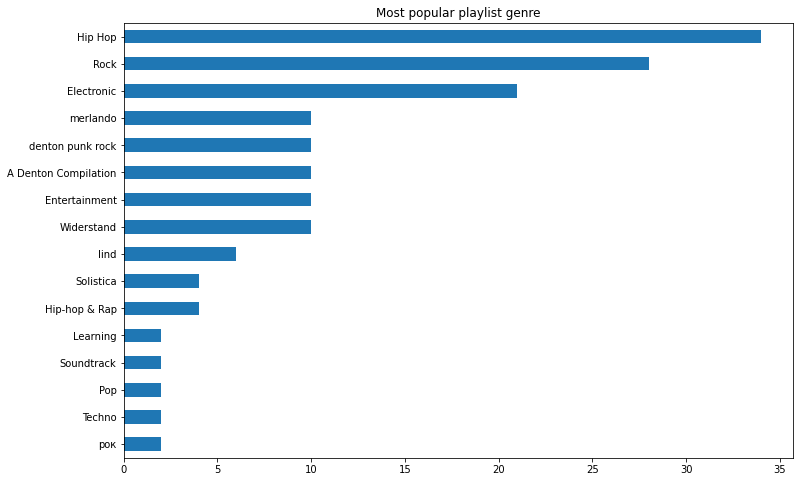

In [ ]:
count_ser = sub_df['playlist_genre'].value_counts();  # Tính tần số theo thế loại
count_ser = count_ser.nlargest(20).sort_values(ascending=True); # Lấy top 20 và sắp xếp tăng
count_ser.plot(figsize=(12, 8),kind='barh', title = 'Most popular playlist genre');

**Nhận xét**<br>
- Những thể loại playlist phố biến là Electronic, Hip Hop, Rock, Rap
- Thể loại playlist phố biến nhất là Electronic.


####2. Phân tích tương quan đa biến

In [ ]:
mean_like_ser = sub_df.groupby(by='playlist_genre').mean() # trung bình số like 
mean_like_ser = mean_like_ser['playlist_likes_count'].nlargest(15).sort_values(ascending=True); # Lấy top 10 và sắp xếp tăng

Trực quan

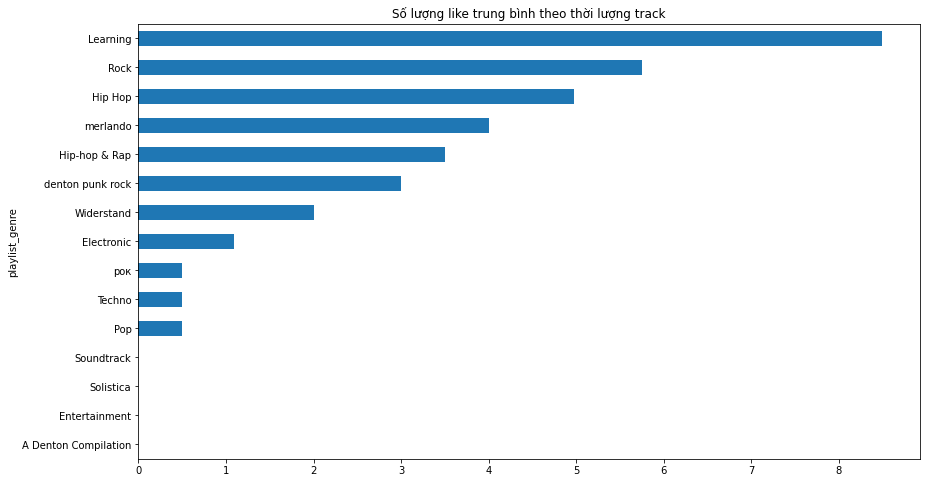

In [ ]:
mean_like_ser.plot( figsize=(14,8), kind='barh',title='Số lượng like trung bình theo thời lượng track');

**Nhận xét**<br>
- Thể loại `playlist` được người dùng yêu thích nhất là `learnning` với số lượng like trung bình là khoảng 8 like
- Theo sau là những thể loại `Electronic`, `Hip Hop`, `Hip-hop & Rap` và `Pop`


## Câu hỏi 3 : Quốc gia nào có nhiều người dùng nhất

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['user_country_name','user_id']]
sub_df = sub_df[sub_df['user_country_name'].notna()]
sub_df = sub_df[sub_df['user_id'].notna()]

####1. Phân tích đơn biến


In [ ]:
sub_df['user_country_name'].describe()

count              1021
unique               49
top       United States
freq                345
Name: user_country_name, dtype: object

Trực quan hoá

United States                        345
Germany                               93
United Kingdom                        77
Netherlands                           65
France                                60
Indonesia                             46
Canada                                44
Guam                                  36
Thailand                              28
Philippines                           27
Argentina                             19
Australia                             16
Mexico                                16
Switzerland                           16
Brazil                                15
Spain                                 14
Denmark                               12
Ukraine                               10
Chile                                  7
South Africa                           7
Belgium                                6
Angola                                 5
Austria                                5
Estonia                                5
Ireland         

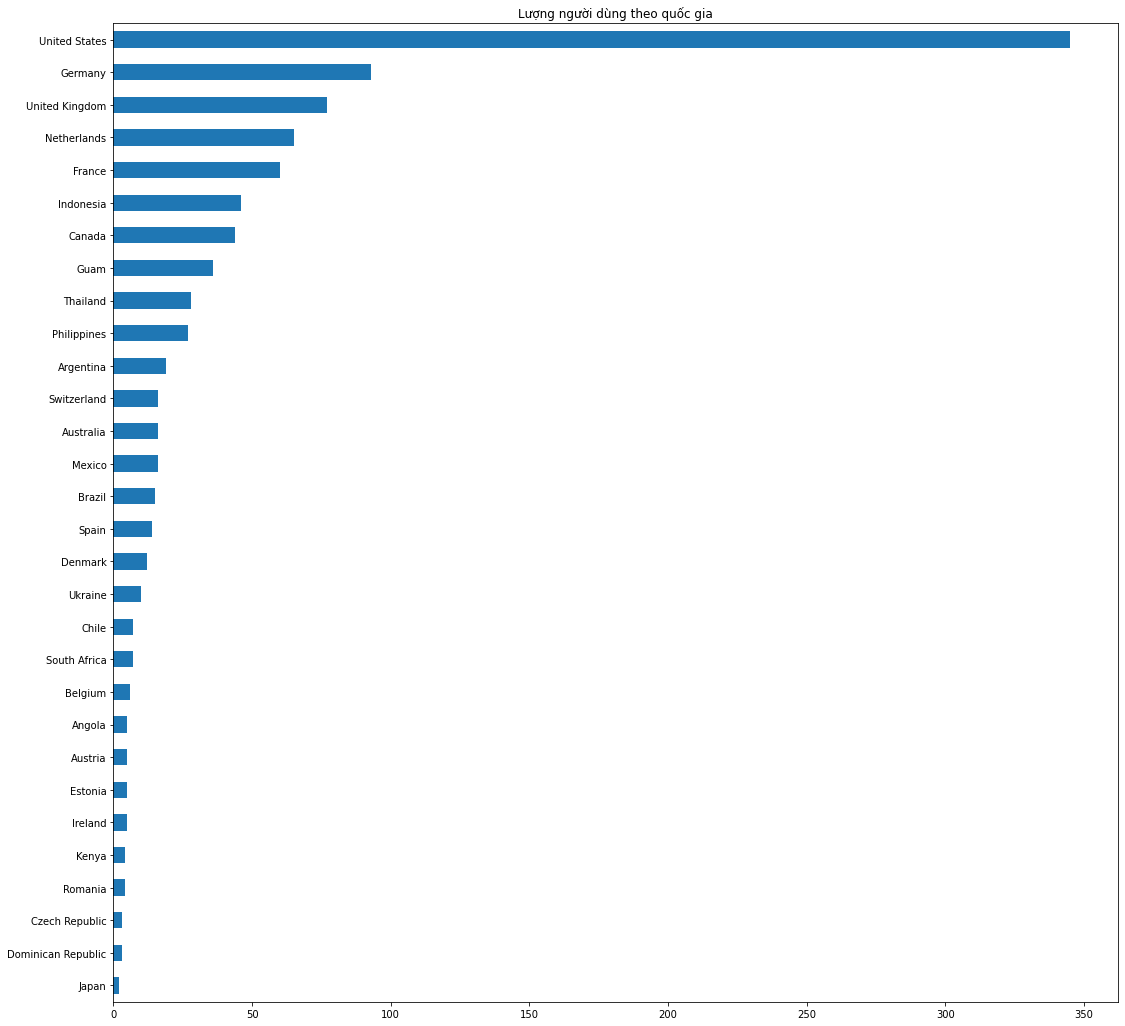

In [ ]:
count_ser = sub_df['user_country_name'].value_counts();  # Tính tần số theo quốc gia
print(count_ser)
count_ser = count_ser.nlargest(30).sort_values(ascending=True); # Lấy top 30 và sắp xếp tăng
count_ser.plot(figsize=(18, 18),kind='barh', title = 'Lượng người dùng theo quốc gia');

**Nhận xét**<br>
-Lượng người dùng của hệ thống nhiều nhất là các nước Mỹ, Đức , Anh. Trong đó Mỹ đứng đầu danh sách.

## Câu hỏi 4 : Quốc gia nào có nhiều người sáng tạo nội dung / người dùng nhất

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['user_country_name','user_creator_subscription']]
sub_df = sub_df[sub_df['user_country_name'].notna()]

####1. Phân tích đơn biến


In [ ]:
sub_df.describe().round(1)

,user_country_name,user_creator_subscription
count,1021,1021
unique,49,2
top,United States,free
freq,345,1002


In [ ]:
sub_df = percentile95_categorical(sub_df, 'user_country_name');  # Loại bớt outliner chọn khoảng 95%

Trực quan hoá

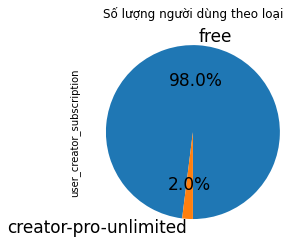

In [ ]:
count_ser_2 = sub_df['user_creator_subscription'].value_counts();  # Tính tần số theo người sáng tạo nội dung
count_ser_2.plot(figsize=(15, 4),kind='pie', title = 'Số lượng người dùng theo loại',autopct='%1.1f%%', startangle=270, fontsize=17);


**Nhận xét**<br>
-Tỉ lệ người dùng miễn phí chiếm số lượng lớn (98%) so với số người sáng tạo nội dung (2%).

####2. Phân tích tương quan đa biến

In [ ]:
# Đếm số người sáng tạo nội dung theo quốc gia
people_count = sub_df['user_country_name'].value_counts(); 
creator_count = sub_df[sub_df['user_creator_subscription']=='creator-pro-unlimited']['user_country_name'].value_counts(); 
creater_ratio = creator_count/people_count
creater_ratio = creater_ratio.nlargest(6).sort_values(ascending=True); # Lấy top 10 và sắp xếp tăng

Trực quan

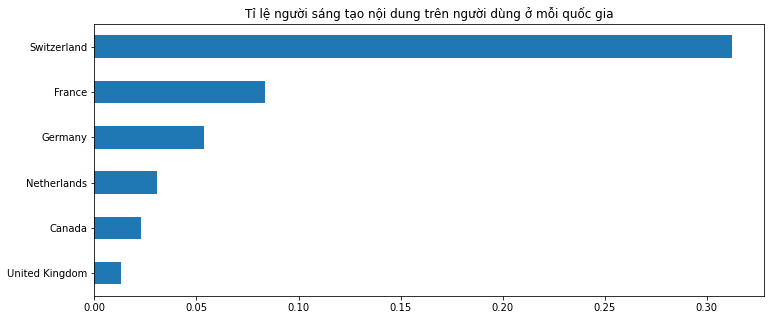

In [ ]:
creater_ratio.plot( figsize=(12,5), kind='barh',title='Tỉ lệ người sáng tạo nội dung trên người dùng ở mỗi quốc gia');

**Nhận xét**<br>
-Tỉ lệ người sáng tạo nội dung trên tỉ lệ người dùng tại Thụy Sĩ là cao nhất trong hệ thống, theo sau lần lượt là Pháp và Đức.

## Câu hỏi 5 : Thống kê số lượng follower theo quốc gia 

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['user_followers_count','user_country_name']]
sub_df = sub_df[sub_df['user_country_name'].notna()]

####1. Phân tích đơn biến


In [ ]:
sub_df['user_followers_count'].describe().round(1)

count    1021.0
mean      123.8
std       330.6
min         0.0
25%         6.0
50%        24.0
75%       111.0
max      2650.0
Name: user_followers_count, dtype: float64

In [ ]:
sub_df['user_country_name'].describe()

count              1021
unique               49
top       United States
freq                345
Name: user_country_name, dtype: object

In [ ]:
sub_df = percentile95_numerical(sub_df, 'user_followers_count');  # Loại bớt outliner chọn khoảng 95%

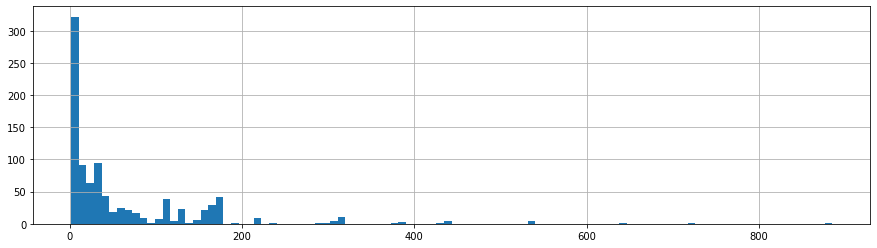

In [ ]:
sub_df['user_followers_count'].hist(figsize=(15, 4), bins=100);

**Nhận xét**<br>
-Số lượng người theo dõi của các tài khoản thường dưới 180 người

####2. Phân tích tương quan đa biến

In [ ]:
sum_follower_ser = sub_df.groupby(by='user_country_name').sum() # tổng số like 
sum_follower_ser = sum_follower_ser['user_followers_count'].nlargest(15).sort_values(ascending=True); # Lấy top 10 và sắp xếp tăng

Trực quan

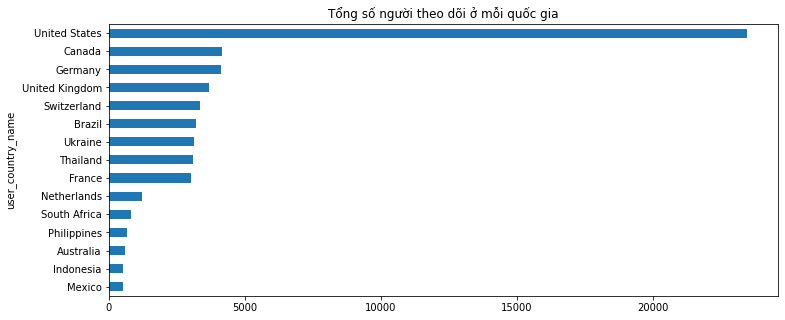

In [ ]:
sum_follower_ser.plot( figsize=(12,5), kind='barh',title='Tổng số người theo dõi ở mỗi quốc gia');

**Nhận xét**<br>
-So với các quốc gia thì Mỹ có số lượng người theo dõi nhiều nhất theo sau đó là Canada.



```
# Định dạng của đoạn này là mã
```

## Câu hỏi 6 : Thống kê lượt thích, bình luận, lượt chạy, thời lượng và năm xuất bản của track

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['track_likes_count','track_comment_count', 'track_playback_count', 'track_duration', 'track_display_date']]
# sub_df = sub_df[sub_df['track_genre'].notna()]

####1. Phân tích đơn biến


In [ ]:
sub_df['track_duration']=sub_df['track_duration']/1000

In [ ]:
sub_df.describe().round(1)

,track_likes_count,track_comment_count,track_playback_count,track_duration
count,1438.0,1438.0,1438.0,1438.0
mean,21.9,0.7,1920.9,253.8
std,180.5,3.0,17674.9,449.8
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,12.0,126.0
50%,1.0,0.0,50.0,186.4
75%,3.0,0.0,208.8,241.2
max,3784.0,64.0,422823.0,8796.1


In [ ]:
sub_df = percentile95_numerical(sub_df,'track_duration')   # Loại bớt outliner chọn khoảng 95%
sub_df = percentile95_numerical(sub_df,'track_comment_count')   # Loại bớt outliner chọn khoảng 95%
sub_df = percentile95_numerical(sub_df,'track_likes_count')   # Loại bớt outliner chọn khoảng 95%
sub_df = percentile95_numerical(sub_df,'track_playback_count')   # Loại bớt outliner chọn khoảng 95%

Trực quan

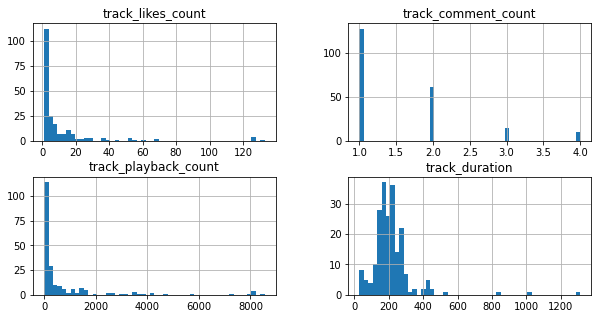

In [ ]:
sub_df.hist(figsize=(10, 5), bins=50);

**Nhận xét**<br>
-Số lượt thích của 1 track thường dưới 20.

-Số lượt chạy của 1 track thường dưới 100.

-Thời lượng của 1 track thường dưới 300s.

####2. Phân tích tương quan đa biến

Trực quan

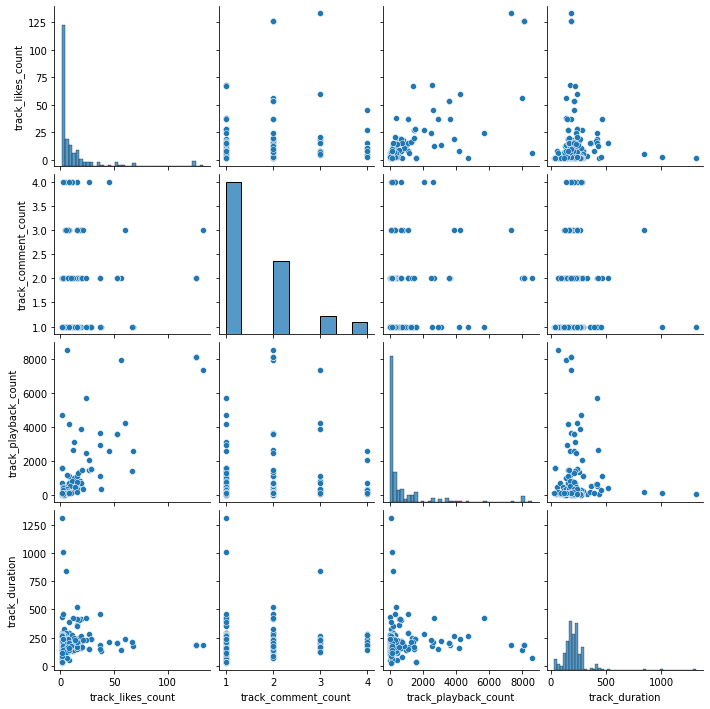

In [ ]:
sns.pairplot(sub_df);

Số lượt chạy và số lượt like có liên quan lớn đến nhau.

## Câu hỏi 7 : Sự ảnh hưởng của số lượng tag với số lượt xem, tải xuống và thích của track

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['track_tag_list', 'track_likes_count','track_download_count', 'track_playback_count']]
sub_df['track_tag_list']=sub_df['track_tag_list'].str.split()
sub_df=sub_df.dropna()
sub_df['track_tag_list'] = sub_df.track_tag_list.map(len)
sub_df.rename(columns={"track_tag_list": "track_tag_list_count"}, inplace=True)
sub_df

,track_tag_list_count,track_likes_count,track_download_count,track_playback_count
0,7,5.0,0.0,75.0
1,10,8.0,0.0,90.0
2,7,16.0,0.0,182.0
6,7,4.0,0.0,324.0
8,6,1.0,0.0,75.0
...,...,...,...,...
2392,1,2.0,0.0,12.0
2393,1,1.0,0.0,15.0
2399,1,2.0,0.0,12.0
2400,1,1.0,0.0,15.0


####1. Phân tích đơn biến


In [ ]:
sub_df.describe().round(1)
  


,track_tag_list_count,track_likes_count,track_download_count,track_playback_count
count,652.0,652.0,652.0,652.0
mean,3.6,30.8,4.0,2923.8
std,4.5,243.9,17.3,25111.8
min,1.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,18.0
50%,1.0,1.0,0.0,58.0
75%,5.0,5.0,0.0,237.2
max,30.0,3784.0,100.0,422823.0


In [ ]:
sub_df = percentile95_numerical(sub_df,'track_playback_count') # Loại bớt outliner chọn khoảng 95%

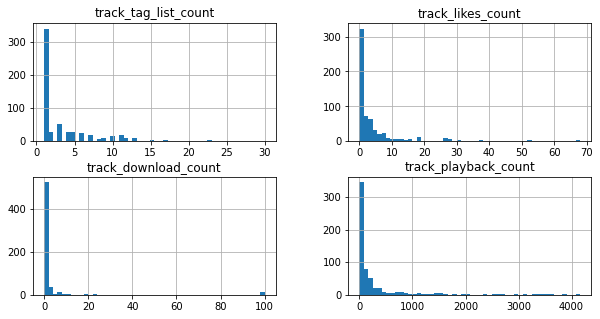

In [ ]:
sub_df.hist(figsize=(10, 5), bins=50);

**Nhận xét**<br>
-Số lượt thích của 1 track thường dưới 20.

-Số lượt chạy của 1 track thường dưới 100.

-Lượt tải về của 1 track thường dưới 10 lượt.

-Số tag của 1 track thường dưới 10.

####2. Phân tích tương quan đa biến

In [ ]:
normalized_df=(sub_df-sub_df.mean())/sub_df.std()
ssub_df= sub_df['track_tag_list_count']
normalized_df['track_tag_list_count'] = ssub_df
sub_ser = normalized_df.groupby('track_tag_list_count').mean()




Trực quan



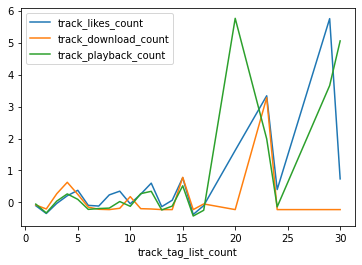

In [ ]:
sub_ser.plot.line();

Trực quan (scatterplot, jointplot, kde plot, correlation matrix)




```
# Định dạng của đoạn này là mã
```

## Câu hỏi 8 : Thống kê nghệ sĩ ở đâu dc like nhiều

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

In [ ]:
sub_df = df[['user_likes_count','user_country_name']]
sub_df = sub_df[sub_df['user_likes_count'].notna()]
sub_df = sub_df[sub_df['user_country_name'].notna()]
sub_df

,user_likes_count,user_country_name
0,1,United Kingdom
1,1,United Kingdom
2,1,United Kingdom
3,190,United Kingdom
4,190,United Kingdom
...,...,...
2454,29,Gabon
2455,4,Costa Rica
2456,3,Sweden
2457,1,Italy


####1. Phân tích đơn biến


Xử lý Outlier


In [ ]:
sub_df = percentile95_categorical(sub_df,'user_country_name')   # Loại bớt outliner chọn khoảng 95%

Trực quan


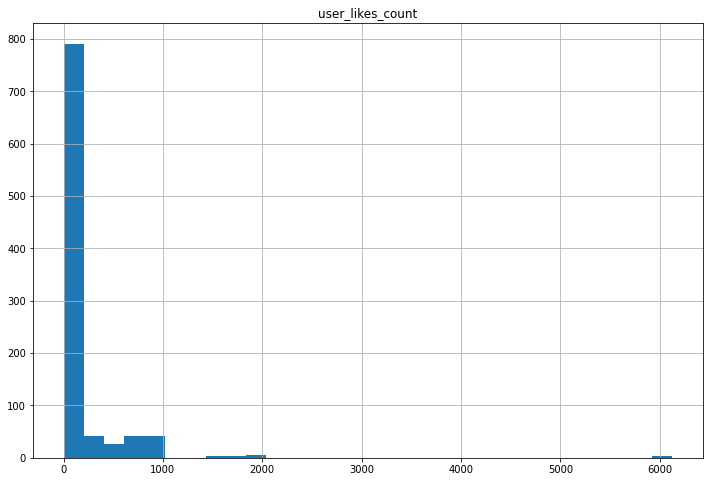

In [ ]:
sub_df.hist(figsize=(12, 8),bins=30);

**Nhận xét**<br>
-Số lượt like của người dùng thường dưới 1000.

####2. Phân tích tương quan đa biến

In [ ]:
mean_like_ser = sub_df.groupby("user_country_name").mean() # trung bình số like 
mean_like_ser = mean_like_ser['user_likes_count'].nlargest(15).sort_values(ascending=True); # Lấy top 10 và sắp xếp tăng
mean_like_ser

user_country_name
Chile               23.142857
Canada              28.068182
Netherlands         41.184615
Germany             44.978495
Argentina           62.105263
Australia           86.062500
France              92.200000
Belgium            145.000000
United Kingdom     151.727273
United States      163.889855
Ukraine            168.000000
Thailand           263.000000
Brazil             404.066667
Guam               978.000000
Switzerland       1639.312500
Name: user_likes_count, dtype: float64

Trực quan


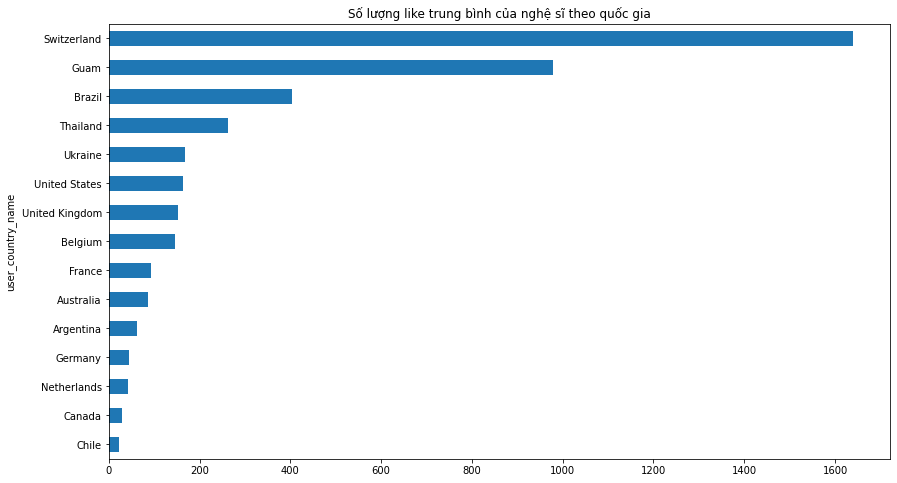

In [ ]:
mean_like_ser.plot( figsize=(14,8), kind='barh',title='Số lượng like trung bình của nghệ sĩ theo quốc gia');

**Nhận** **xét**

Nghệ sĩ của Thụy Sĩ được like nhiều nhất với số lượt like trung bình là 1600.

## Câu hỏi 9 : Thống kê thời lượng theo quốc gia

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

####1. Phân tích đơn biến


In [ ]:
sub_df = df[['track_duration','user_country_name']]
sub_df = sub_df[sub_df['track_duration'].notna()]
sub_df = sub_df[sub_df['user_country_name'].notna()]
sub_df.describe().round(1)

,track_duration
count,700.0
mean,284593.9
std,527557.3
min,0.0
25%,157278.2
50%,204661.0
75%,251321.5
max,8796056.0


In [ ]:
sub_df['track_duration']=sub_df['track_duration']/1000      # thời lượng tính tính theo giây
sub_df

,track_duration,user_country_name
0,1436.186,United Kingdom
1,1285.068,United Kingdom
2,2019.709,United Kingdom
3,324.223,United Kingdom
4,157.996,United Kingdom
...,...,...
2402,188.569,Thailand
2403,162.443,Thailand
2404,149.016,Thailand
2405,230.369,Thailand


In [ ]:
sub_df = percentile95_numerical(sub_df,'track_duration')   # Loại bớt outliner chọn khoảng 95%
sub_df = percentile95_categorical(sub_df,'user_country_name')   # Loại bớt outliner chọn khoảng 95%

In [ ]:
count_ser = sub_df['user_country_name'].value_counts();  # Tính tần số theo thế loại
count_ser = count_ser.nlargest(20).sort_values(ascending=True); # Lấy top 20 và sắp xếp tăng


**Trực Quan**


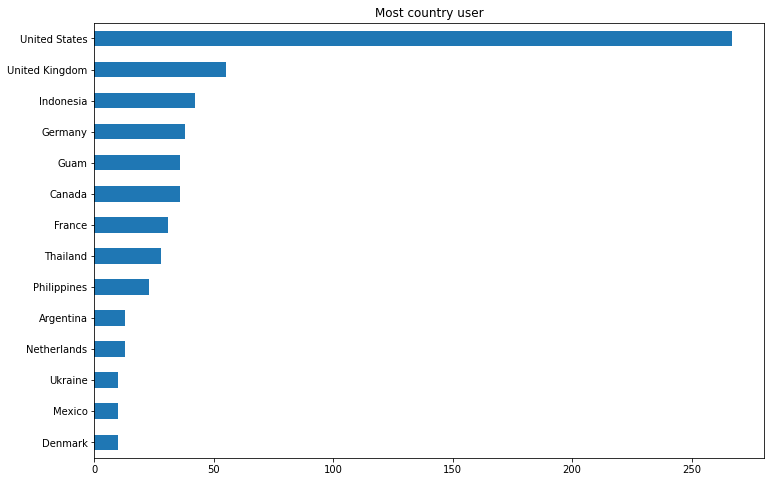

In [ ]:
count_ser.plot(figsize=(12, 8),kind='barh', title = 'Most country user');


**Nhận xét**<br>
-Quốc gia có lượng người dùng có playlist lớn nhất là US.


####2. Phân tích tương quan đa biến

In [ ]:
mean_like_ser = sub_df[['track_duration']].groupby(sub_df["user_country_name"]).mean() # trung bình số like 
mean_like_ser = mean_like_ser['track_duration'].nlargest(15).sort_values(ascending=True); # Lấy top 10 và sắp xếp tăng

Trực quan (scatterplot, jointplot, kde plot, correlation matrix)


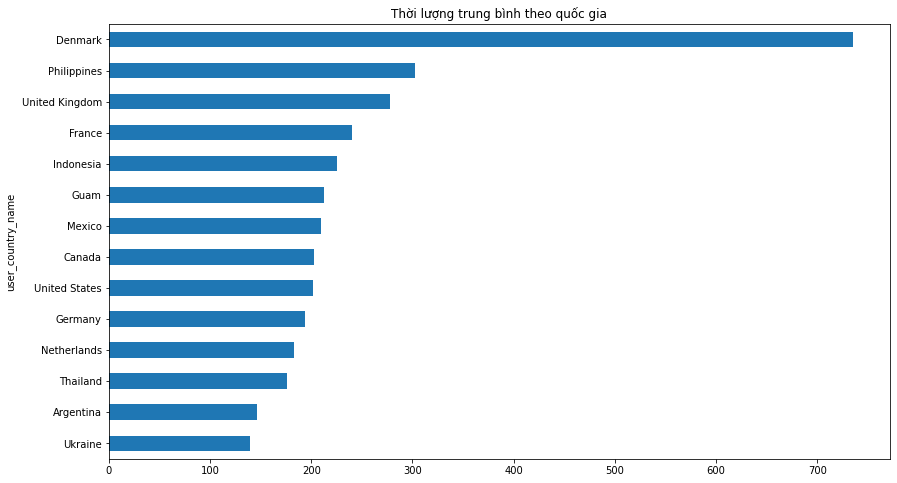

In [ ]:
mean_like_ser.plot( figsize=(14,8), kind='barh',title='Thời lượng trung bình theo quốc gia');

**Nhận xét**
- Đan Mạch có thời lượng trung bình lớn nhất lên đến >700s tương đương 12 phút. 

- Thời lượng trung bình của các nước là khoảng 250s tương đương 4 phút.

## Câu hỏi 10 : Thống kê track nào dc chọn trong playlist nhiều nhất

* Chọn những trường cần xử lý và loại bỏ giá trị NULL

####1. Phân tích đơn biến


In [ ]:
sub_df = df['playlist_tracks'].dropna().str.split(', ')
sub_df = sub_df.explode()


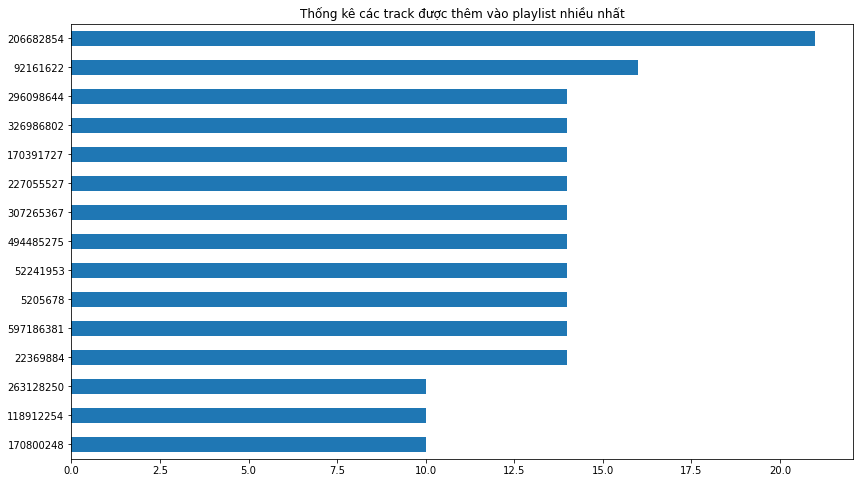

In [ ]:
count_ser = sub_df.value_counts().drop('',axis =0).nlargest(15).sort_values(ascending=True);
count_ser.plot( figsize=(14,8), kind='barh',title='Thống kê các track được thêm vào playlist nhiều nhất');

**Nhận xét**<br>
-Track có id là 206682854 được thêm vào nhiều playlist nhất.

##Danh sách kiểm tra phân tích dữ liệu

### Understanding data (Đặt vấn đề)

*Nhiều nhất, ít nhất, .. ? <br>
*Quan hệ giữa các trường?

### Preprocessing

* Số lượng sample và ý nghĩa
* Số lượng feature, kiểu dữ liệu và ý nghĩa


Data cleaning


1. Missing data ? 
2. Noisy data ? 

Data intergration

1. Select required data (Chọn những trường cần thiết)
2. Match the data schema (So khớp và nhập các bảng)
3. Eliminate redundant and duplicate data (Loại dư thừa và lặp)
4. Detect and resolve inconsistencies (Phát hiện và giải quyết xung đột)

###EDA 

1. Trực quan hoá và phân tích mối quan hệ đơn biến (histogram, distplot,
boxplot)
2. Trực quan hoá và phân tích các tương quan đa biến (scatterplot, jointplot,
kde plot, correlation matrix)
